# Analysis of Google Playstore Apps

## Import libraries

The first step is to import required libraries that will be used throughout the project such as,
- Pandas for data reading the csv file
- matplotlib, seaborn for visualization
- sqlite3 for database handling

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sqlite3
from sqlite3 import Error
import ipywidgets as widgets
import re
%matplotlib inline

In [133]:
pd.options.display.max_rows = 999

## Reading the dataset

We are using pandas to load the dataset into a dataframe.

In [134]:
df = pd.read_csv('/content/googleplaystore.csv')

In [135]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Our dataset has 10841 rows and 13 columns

In [136]:
df.shape

(10841, 13)

In [137]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## Data cleaning

 We have read the csv file into a dataframe. To create a normalized database from this data, we need to check if the data is free of inconsistencies and anomalies.
 
Some important things to consider before creating a database:
- Check for missing or null values
- Check if each column has valid entries (for example in terms of datatypes, acceptable value range etc.)
- Check for duplicate rows
- Remove extraneous rows and unwanted columns, etc.

#### Print the info of the data

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


From the above output, we can see that *Rating*, column has a large number of *null* values, *Type* and *ContentRating* have one *null* value, and *CurrentVer* and *AndroidVer* also have some *null* values.
#### However *Rating* column having *null* values is no problem! We interpret such apps as those that have not received any rating.


#### Now let us look into *Type* and *Content Rating* columns having null entries


In [139]:
df[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


There is only one row where *Type* is *NaN*. As the *Price* is 0 for this row, we make *Type* as *Free*. Now, there is no row with null values in *Type* column.

In [140]:
df.loc[df['Type'].isnull(),'Type'] = 'Free'

In [141]:
df[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [142]:
df[df['App']=='Command & Conquer: Rivals']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,Free,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


Perform similar step for *Content Rating*, i.e., print the row having null value for *Content Rating*.

In [143]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


This row looks errorneous, so we delete this row from our dataframe to avoid inconsistency. As there is only one row, we can drop it by index as shown below.

In [144]:
if 10472 in df.index:
    df.drop([10472],inplace=True)

In [145]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


The inconsistent row has been removed successfully!

#### Moving on, we need to convert *Price* column's datatype to Float.
The price values for paid apps are basically string in the original data, starting with $ symbol. To perform analysis or comparison we have to convert these values into float.

In [146]:
paid_price_converted_to_float = False
paid_app_price_series = df.loc[df['Type']=='Paid','Price']
# paid_app_price_series.head(10)

In [147]:
indices = []
items = []
for ind,item in paid_app_price_series.iteritems():
    # if paid_price_converted_to_float == False:
        # item = float(item.lstrip('$'))
        item = float(re.findall("[\d].[\d]*", item)[0])
        items.append(item)
        indices.append(ind)
        # paid_price_converted_to_float = True


In [148]:
paid_app_price_series.update(pd.Series(items,indices,dtype='float64'))

In [149]:
df.loc[df['Type']=='Paid','Price'] = paid_app_price_series

In [150]:
paid_app_price_series.unique()

array([4.99, 3.99, 6.99, 1.49, 2.99, 7.99, 5.99, 3.49, 1.99, 9.99, 7.49,
       0.99, 9.0, 5.49, 10.0, 24.0, 11.0, 79.0, 16.0, 14.0, 1.0, 29.0,
       12.0, 2.49, 1.5, 19.0, 15.0, 33.0, 74.0, 39.0, 3.95, 4.49, 1.7,
       8.99, 2.0, 3.88, 25.0, 399.0, 17.0, 400.0, 3.02, 1.76, 4.84, 4.77,
       1.61, 2.5, 1.59, 6.49, 1.29, 5.0, 13.0, 299.0, 379.0, 37.0, 18.0,
       389.0, 8.49, 1.75, 4.85, 46.0, 109.0, 154.0, 3.08, 2.59, 4.8, 1.96,
       3.9, 4.59, 3.04, 4.29, 2.6, 3.28, 4.6, 28.0, 2.95, 2.9, 1.97,
       200.0, 89.0, 2.56, 30.0, 3.61, 394.0, 1.26, 1.2, 1.04],
      dtype=object)

Now convert all entries of *Price* column into float type.

In [151]:
try:
    df['Price'] = df['Price'].astype('float')
except ValueError as e:
    print(e)

#### Check for any duplicate values

In [152]:
grouped_df = df.groupby(df.columns.tolist(),as_index=False).size()

In [153]:
df.duplicated(keep='first').sum()

483

There are 482 duplicate rows, which are dropped in the following cell.

In [154]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated(keep='first').sum()

0

In [155]:
df.shape

(10357, 13)

#### Now our updated data is left with 10358 unique records.

#### We also need to convert *Installs* into int datatype.

In [156]:
df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10357, dtype: object

In [157]:
no_of_installs_series = df['Installs']

In [158]:
indices = []
items = []
for ind,item in no_of_installs_series.iteritems():
    item = item.replace(',','')
    item = int(float(item.rstrip('+')))
#     print(type(item))
    indices.append(ind)
    items.append(item)

In [159]:
no_of_installs_series.update(pd.Series(items,indices,dtype='int64'))

In [160]:
df['Installs'] = no_of_installs_series

In [161]:
df['Installs'] = df['Installs'].astype('int')
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10357, dtype: int64

The *Installs* column has now been converted into integer type.
#### Now we need to make sure that *Size* column is in proper format.

In [162]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10357, dtype: object

For proper quantitative analysis, we need to convert this column into numeric type.
For many records, *Size* column has the value *Varies with device*. We can assign a special value -1 for records having Size = Varies with device. For the remaining, we will convert them into number of bytes. 

In [163]:
size_series = df['Size']

In [164]:
items = []
indices = []
for ind,item in size_series.iteritems():
    if item == 'Varies with device':
        n = float(-1)
    else:
        size_identifier = item[-1] #gets the last character to know if it is M (for MB) or K (for KB)
        if size_identifier == 'M' or size_identifier == 'm':
            n = float(item[:len(item)-1]) 
        elif size_identifier == 'K' or size_identifier == 'k':
            n = float(item[:len(item)-1]) / 1000
    items.append(n)
    indices.append(ind)

In [165]:
size_series.update(pd.Series(items,indices,dtype='float64'))
df['Size'] = size_series

In [166]:
df['Size'] = df['Size'].astype('float64')
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839    -1.0
10840    19.0
Name: Size, Length: 10357, dtype: float64

### Convert the *Last Updated* column into *Date* format.

In [167]:
df['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10357, dtype: object

In [168]:
from datetime import datetime

In [169]:
# converting month strings to numbers
date_series = df['Last Updated']

In [170]:
date_objs = []
date_ind = []
for index, date_str in date_series.iteritems():
    month,date,year = date_str.split(' ')
    datetime_object = datetime.strptime(date_str, "%B %d, %Y")
    date_objs.append(datetime_object)
    date_ind.append(index)

In [171]:
date_series.update(pd.Series(date_objs,date_ind))

In [172]:
df['Last Updated'] = date_series

In [173]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up


We can see that the *Last Updated* column is now converted into python Datetime datatype.
Now we will modify the representation of *Category* column for better readability.

In [174]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

Remove the underscores from the category strings and convert them into titlecase i.e. capitalize first letter of each string.

In [175]:
cat_list = []
cat_ind = []
category = df['Category']
for ind, cat in category.iteritems():
    cat = cat.replace('_',' ')
    cat = cat.capitalize()
    cat_list.append(cat)
    cat_ind.append(ind)
category.update(pd.Series(cat_list,cat_ind))
df['Category'] = category

In [176]:
df['Category'].unique()

array(['Art and design', 'Auto and vehicles', 'Beauty',
       'Books and reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Entertainment', 'Events', 'Finance',
       'Food and drink', 'Health and fitness', 'House and home',
       'Libraries and demo', 'Lifestyle', 'Game', 'Family', 'Medical',
       'Social', 'Shopping', 'Photography', 'Sports', 'Travel and local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video players', 'News and magazines', 'Maps and navigation'],
      dtype=object)


### Now our data seems ready to be inserted into the relational database!

## Database Schema
The database consists of following tables:


**Category** : This lookup stores unique categories
```
+---------------+----------+--------+-------------------------+---------+
| Column        |Data Type | PK     | FK                      | Is Null |
+---------------+----------+--------+-------------------------+---------+
| category_id   | Integer  | True   | True (App->category_id) | False   |
| category_name | Text     | False  | False                   | False   |
+---------------+----------+--------+-------------------------+---------+
```
**Payment** : This lookup stores unique payment types (free/paid)
```
+---------------+----------+--------+--------------------------------+----------+
| Column        |Data Type | PK     | FK                             | Is Null  |
+---------------+----------+--------+--------------------------------+----------+
| type_id       | Integer  | True   | True (App->payment_type_id)    | False    |
| type_desc     | Text     | False  | False                          | False    |
+---------------+----------+--------+--------------------------------+----------+
```
**ContentRating** : This table stores unique content ratings
```
+---------------+----------+--------+--------------------------------+-----------+
| Column        |Data Type | PK     | FK                             | Is Null   |
+---------------+----------+--------+--------------------------------+-----------+
| rating_id     | Integer  | True   | True (App->cr_id)              | False     |
| rating_desc   | Text     | False  | False                          | False     |
+---------------+----------+--------+--------------------------------+-----------+
```
**App** : This is the main entity we're interested in, all other tables linked via FK relationship
```
+-----------------+----------+--------+--------------------------------+----------+
| Column          |Data Type | PK     | FK                             | Is Null  |
+-----------------+----------+--------+--------------------------------+----------+
| app_id          | Integer  | True   | False                          | False    |
| app_name        | Text     | False  | False                          | False    | 
| category_id     | Integer  | False  | True (Category->category_id)   | False    |
| ratings         | Float    | False  | False                          | True     |
| review_count    | Integer  | False  | False                          | False    |
| size            | Float    | False  | False                          | False    |
| installs_count  | Integer  | False  | False                          | False    |
| payment_type_id | Integer  | False  | True (Payment->type_id)        | False    |
| cr_id           | Integer  | False  | True (ContentRating->rating_id)| False    |
| last_updated    | Date     | False  | False                          | False    |
| curr_app_ver    | Text     | False  | False                          | False    |
| base_android_ver| Text     | False  | False                          | False    |
+-----------------+----------+--------+--------------------------------+----------+
```

## Utility functions
### Function to create database

In [177]:
def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn

We call the function *create_connection()* to create an instance of database namely *app_db*.

In [178]:
db_filename = 'app_db'

### Function to create a table

In [179]:
def create_table(conn, create_table_sql, drop_table_name=None):
    
    if drop_table_name: # You can optionally pass drop_table_name to drop the table. 
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

## Create the Category table
- Create the Category table:
```SQL
Category
    [category_id] Integer not null primary key
    [category_name] Text not null
```
- Get the distinct/unique categories from the dataframe and insert them into the table.


In [180]:
categories = sorted(df['Category'].unique().tolist()) # get unique categories, convert them into list, sort alphabetically
# print(type(categories))
conn = create_connection(db_filename)
with conn:
    c = conn.cursor()
    sql_statement = '''Create table Category (category_id integer not null primary key, category_name text not null)'''
    create_table(conn, sql_statement, 'Category')
    for cat in categories:
        c.execute('''Insert into Category (category_name) values (?)''',(cat,))
    c.execute('''Select * from Category''')
    print(pd.read_sql_query("SELECT * FROM Category", conn))
conn.close()

    category_id        category_name
0             1       Art and design
1             2    Auto and vehicles
2             3               Beauty
3             4  Books and reference
4             5             Business
5             6               Comics
6             7        Communication
7             8               Dating
8             9            Education
9            10        Entertainment
10           11               Events
11           12               Family
12           13              Finance
13           14       Food and drink
14           15                 Game
15           16   Health and fitness
16           17       House and home
17           18   Libraries and demo
18           19            Lifestyle
19           20  Maps and navigation
20           21              Medical
21           22   News and magazines
22           23            Parenting
23           24      Personalization
24           25          Photography
25           26         Productivity
2

#### Create category_desc to category_id dictionary

In [181]:
def cat_desc_to_cat_id_dict(db_filename):
    conn = create_connection(db_filename)
    category_dict = {}
    with conn:
        c = conn.cursor()
        c.execute('''Select * from Category''')
        output = c.fetchall()
        for tpl in output:
            category_dict[tpl[1]] = tpl[0]
    return category_dict

### Create the Payment table

```SQL
Payment
    [type_id] Integer not null primary key
    [type_desc] Text not null
```

In [182]:
payment_type = ['Paid','Free']
conn = create_connection(db_filename)
with conn:
    sql_statement = '''Create table Payment (type_id Integer not null primary key, type_desc Text not null)'''
    create_table(conn,sql_statement,'Payment')
    c = conn.cursor()
    for i in payment_type:
        c.execute('''Insert into Payment (type_desc) values (?)''',(i,))
    print(pd.read_sql_query('''Select * from Payment''',conn))

   type_id type_desc
0        1      Paid
1        2      Free


#### Create dictionary to map type_desc to type_id

In [183]:
def type_desc_to_type_id_dict(db_filename):
    conn = create_connection(db_filename)
    type_dict = {}
    with conn:
        c = conn.cursor()
        c.execute('''Select * from Payment''')
        output = c.fetchall()
        for tpl in output:
            type_dict[tpl[1]] = tpl[0]
    return type_dict

### Create the ContentRating table
```SQL
ContentRating
    [rating_id] Integer not null primary key
    [rating_desc] Text not null
```

In [184]:
# get the unique values of ContentRating from the dataframe
content_rating = sorted(df['Content Rating'].unique().tolist())
print(content_rating)
# create the table and insert values
conn = create_connection(db_filename)
with conn:
    sql_statement = '''Create table ContentRating (rating_id integer not null primary key, 
                        rating_desc text not null)'''
    create_table(conn, sql_statement, 'ContentRating')
    c = conn.cursor()
    for i in content_rating:
        print(i)
        c.execute('''Insert into ContentRating (rating_desc) values (?)''',(i,))
#     print(pd.read_sql_query('''Select * from ContentRating''', conn))

['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+', 'Teen', 'Unrated']
Adults only 18+
Everyone
Everyone 10+
Mature 17+
Teen
Unrated


#### Create dictionary to map rating_desc to rating_id

In [185]:
def rating_desc_to_rating_id_dict(db_filename):
    conn = create_connection(db_filename)
    rating_dict = {}
    with conn:
        c = conn.cursor()
        c.execute('''Select * from ContentRating''')
        output = c.fetchall()
        for tpl in output:
            rating_dict[tpl[1]] = tpl[0]
    return rating_dict

### Create the App table
```SQL
App
    [app_id] Integer not null primary key
    [app_name] Text not null
    [category_id] Integer not null foreign key to Category table
    [ratings] Float 
    [review_count] Integer not null
    [size] Float not null
    [installs_count] Integer not null
    [payment_type_id] Integer not null foreign key to Payment table
    [cr_id] Integer not null foreign key to ContentRating table
    [last_updated] Date not null
    [curr_app_ver] Text not null
    [base_android_ver] Text not null
```

In [186]:
apps = df['App'].tolist()
rating = df['Rating'].tolist()
reviews = df['Reviews'].tolist()
size = df['Size'].tolist()
installs = df['Installs'].tolist()
category = df['Category'].tolist()
payment_type = df['Type'].tolist()
cur_ver = df['Current Ver'].tolist()
and_ver = df['Android Ver'].tolist()
date = df['Last Updated'].tolist()
content_rating = df['Content Rating'].tolist()
category_id = []
cr_id = []
type_id = []
cid_dict = cat_desc_to_cat_id_dict(db_filename)
pid_dict = type_desc_to_type_id_dict(db_filename)
crid_dict = rating_desc_to_rating_id_dict(db_filename)
for i in category:
    category_id.append(cid_dict[i])
for i in payment_type:
    type_id.append(pid_dict[i])
for i in content_rating:
    cr_id.append(crid_dict[i])
for i in range(len(date)):
    date[i] = date[i].to_pydatetime()
rows = zip(apps,category_id,rating,reviews,size,installs,type_id,cr_id,date,cur_ver,and_ver)
# type(category_id[0])

In [187]:
conn = create_connection(db_filename)
with conn:
    c = conn.cursor()
    sql_statement = '''Create table App (app_id integer not null primary key,
                        app_name text not null,
                        category_id integer not null,
                        rating float,
                        reviews integer not null,
                        size float not null,
                        installs integer not null,
                        payment_type_id integer not null,
                        cr_id integer not null,
                        last_updated timestamp,
                        cur_app_ver text,
                        base_android_ver text,
                        foreign key (category_id) references Category (category_id),
                        foreign key (cr_id) references ContentRating (rating_id),
                        foreign key(payment_type_id) references Payment (type_id))'''
    create_table(conn, sql_statement, 'App')
    c.executemany('''Insert into App (app_name, category_id, rating, reviews, size, installs, payment_type_id,cr_id, last_updated, cur_app_ver, base_android_ver) values (?,?,?,?,?,?,?,?,?,?,?)''',(rows))
#     c.execute('''Select * from App''')
#     print(c.fetchall())
    print(pd.read_sql_query('''Select * from App''', conn))
    

       app_id  ...    base_android_ver
0           1  ...        4.0.3 and up
1           2  ...        4.0.3 and up
2           3  ...        4.0.3 and up
3           4  ...          4.2 and up
4           5  ...          4.4 and up
...       ...  ...                 ...
10352   10353  ...          4.1 and up
10353   10354  ...          4.1 and up
10354   10355  ...          2.2 and up
10355   10356  ...  Varies with device
10356   10357  ...  Varies with device

[10357 rows x 12 columns]


#### Now as our relational database is ready, we can move onto analysis component.

## Analysis

### Content rating and number of apps available on google playstore
We first start by analyzing the popular target audience of the apps. As the ContentRating table consists of the values of target audience such as 'Teens', 'Mature', 'Everyone', etc., we will create a barplot that shows number of apps for each category in the ContentRating table.

Steps:
- Read distinct ContentRating types from ContentRating table into a list.
- Select count of apps from App table grouped by ContentRating.
- Plot the results using bar plot.

['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+', 'Teen', 'Unrated']


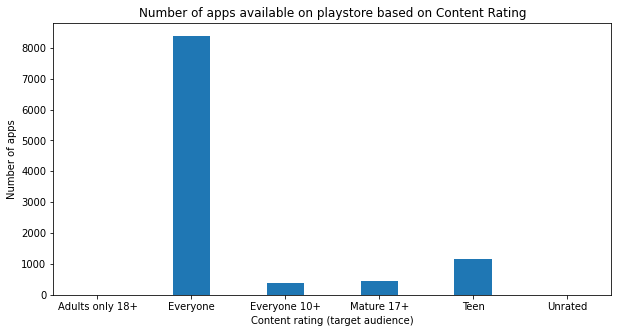

In [188]:
conn = create_connection(db_filename)
with conn:
    audience = []
    counts = []
    c = conn.cursor()
    c.execute('''Select rating_desc from ContentRating''')
    res = c.fetchall() # values of target audience
    for i in res:
        audience.append(i[0])
    print(audience)
    # get total count of apps for each target audience category
    sql_statement = '''Select count(*) from app group by cr_id'''
    c.execute(sql_statement)
    res = c.fetchall()
    for i in res:
        counts.append(i[0])
    fig = plt.figure(figsize = (10, 5))
    
    # creating the bar plot
    plt.bar(audience, counts,width = 0.4)
    plt.title('Number of apps available on playstore based on Content Rating')
    plt.xlabel('Content rating (target audience)')
    plt.ylabel('Number of apps')
    

We can visualize the same thing using a more interactive representation of a pie chart as shown below.
It can be seen that more than 80% of the apps are designed for *Everyone*.
The proportion of *Unrated* apps is very negligible, so it will not play any important role in the analysis.

In [189]:
data = pd.DataFrame({'Count':counts,'Target audience':audience})
fig = px.pie(data, values='Count', names='Target audience', title='Distribution of the number of apps based on content rating')
fig.show()

#### We can observe that there are no apps for *Adults only 18+* and also there are no *Unrated* apps. *Everyone* category has the highest number of apps followed by *Teen*, *Mature 17+* and *Everyone 10+*.

### Number of apps for each category

In [190]:
conn = create_connection(db_filename)
category = []
counts = []
with conn:
    c = conn.cursor()
    # Query the Category table to get distinct categories
    c.execute('''Select category_name from Category''')
    for (i,) in c.fetchall():
        category.append(i)
    # There are total 33 unique app categories
    # Query the app table to get count for each category (group by category id)
    c.execute('''Select category_id, count(*) from App group by category_id''')
    res = c.fetchall() # gives us pairs of (category_id, count)
    for i,j in res:
        counts.append(j)
    # use the dictionary to get corresponding category names
    dic = cat_desc_to_cat_id_dict(db_filename)
    data = pd.DataFrame({'category':category, 'count':counts})
    fig = px.pie(data, values='count', names='category', title='App category and number of apps')
    fig.show()
    

From the above plot, we can see that *Family* is the most popular category among the developers, followed by *Game* and *Tools*.

### Distribution of free and paid apps

In [191]:
conn = create_connection(db_filename)
with conn:
    counts = []
    c = conn.cursor()
    c.execute('''Select count(*), payment_type_id from App group by payment_type_id''')
    res = c.fetchall()
#     print(res)
    c.execute('''Select type_desc from payment''')
    for (i,j) in res:
        counts.append(i)
    data = pd.DataFrame({'apptype':['Paid','Free'],'count':counts})
    # print(data)
#     fig = px.bar(data, x='apptype', y='count')
#     fig.show()
    fig = px.pie(data, values='count', names='apptype', title='Proportion of Free and Paid apps')
    fig.show()

### Top 5 Categories by count of app installs, and avg. rating of apps in each of these categories
Now that we have seen which categories have the highest no. of apps, we can compare this to the categories having highest no. of app installs.

Steps:
- Fetch data from normalized db using an a joined sql statement fetching category name, sum(installs) and avg. rating.
- Group results by catrgory name, and select top 5 after sorting by count of installs (in descending order).
- Plot the results using pie plot.

In [192]:
import datetime
import pandas as pd
import ipywidgets as widgets
import plotly.graph_objects as go
from IPython.display import display
from IPython.display import HTML
import plotly           #(version 4.5.4) #pip install plotly==4.5.4
import plotly.express as px
import plotly.io as pio

conn = create_connection(db_filename)
sql_statement = "select c.category_name,sum(a.installs) as total_installs,avg(a.rating) as avg_ratings from App a, Category c where a.category_id=c.category_id group by c. category_name order by total_installs desc limit 5" 
subset = pd.read_sql_query(sql_statement, conn)
print(subset)

pie_chart = px.pie(
        data_frame=subset,
        values='total_installs',
        names='category_name',
        color='category_name',                      
        color_discrete_sequence=["red","green","blue","orange","pink"],     #set marker colors
        hover_name='avg_ratings',              #values appear in bold in the hover tooltip      
        labels={"category_name":"Category"},       #map the labels
        title='Top 5 Category wise Installs',     #figure title
        template='presentation',            #'ggplot2', 'seaborn', 'simple_white', 'plotly',
                                            #'plotly_white', 'plotly_dark', 'presentation',
                                            #'xgridoff', 'ygridoff', 'gridon', 'none'
        width=800,                          #figure width in pixels
        height=600,                         #figure height in pixels
        hole=0.5,                           #represents the hole in middle of pie
        )



pio.show(pie_chart)
conn.close()

   category_name  total_installs  avg_ratings
0           Game     31544024415     4.281285
1  Communication     24152276251     4.151466
2         Social     12513867902     4.254918
3   Productivity     12463091369     4.201796
4          Tools     11452771915     4.047411


### Analysis from plot
- Though Family Apps had the highest installs, it's nowhere in the top 5 list.
- Android developers need to shift focus to making apps that are in more demand.

### Checking if there is any major difference in paid/free ratings 

Steps:
- Fetch data from normalized db using an a joined sql statement fetching category name, payment_type and avg. rating. Only 
  considering the top 5 categories (by install count)
- Group results by catrgory name,payment_type
- Plot the results using bar plot.


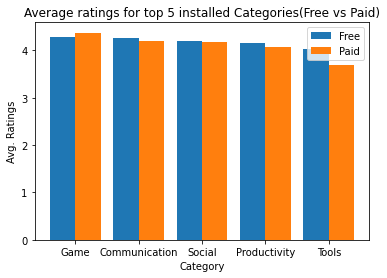

In [193]:
import plotly           #(version 4.5.4) #pip install plotly==4.5.4
import plotly.express as px
import plotly.io as pio

conn = create_connection(db_filename)
#sql_statement = "select b.category_name,avg(a.size) as avg_size,avg(a.rating) as avg_ratings,avg(a.installs) as avg_installs from App a,Category b where a.category_id=b.category_id group by b.category_name order by avg_installs desc"
sql_statement = "select b.category_name,c.type_desc as payment,avg(a.rating) as avg_rating from App a,Category b,Payment c where a.category_id=b.category_id and a.payment_type_id=c.type_id group by b.category_name,payment order by avg_rating desc"
subset = pd.read_sql_query(sql_statement, conn)
#print(subset)
Category_list = ['Game','Communication','Social','Productivity','Tools']

import numpy as np 
import matplotlib.pyplot as plt 
free_apps = []

free_app_data=subset[subset['category_name'].isin(Category_list)]
free_app_data=np.array(free_app_data[free_app_data['payment']=='Free']['avg_rating'])

paid_app_data=subset[subset['category_name'].isin(Category_list)]
paid_app_data=np.array(paid_app_data[paid_app_data['payment']=='Paid']['avg_rating'])


Yfree = free_app_data
YPaid = paid_app_data
  
X_axis = np.arange(len(Category_list))
  
plt.bar(X_axis - 0.2, Yfree, 0.4, label = 'Free')
plt.bar(X_axis + 0.2, YPaid, 0.4, label = 'Paid')
  
plt.xticks(X_axis, Category_list)
plt.xlabel("Category")
plt.ylabel("Avg. Ratings")
plt.title("Average ratings for top 5 installed Categories(Free vs Paid)")
plt.legend()
plt.show()

conn.close()


### Relation between the number of installs and number of reviews

In [194]:
conn = create_connection(db_filename)

with conn:
    c = conn.cursor()
    c.execute('''Select installs, reviews, size from App''')
    res = c.fetchall()
    installs = []
    reviews = []
    sizes = []
    for i,j,k in res:
        if k>0: # consider only valid app sizes
            installs.append(i)
            reviews.append(j)
            sizes.append(k)
    data = pd.DataFrame({'Installs':installs, 'Reviews': reviews, 'Size':sizes})
#     no use of the below plot
#     fig = px.line(data, x="Size", y="Installs", title='Life expectancy in Canada')
#     fig.show()

### Simple Dashboard to check top performer in each category.

In [115]:
distinct_categories = []
distinct_payment_type = []

with conn:
    distinct_categories = pd.read_sql_query('''Select distinct category_name from Category''', conn)
    distinct_categories = distinct_categories['category_name'].values.tolist()
    # print(distinct_categories)
    distinct_payment_type = pd.read_sql_query('''Select distinct type_desc from payment''', conn)
    distinct_payment_type = distinct_payment_type['type_desc'].values.tolist()
    # print(distinct_payment_type)

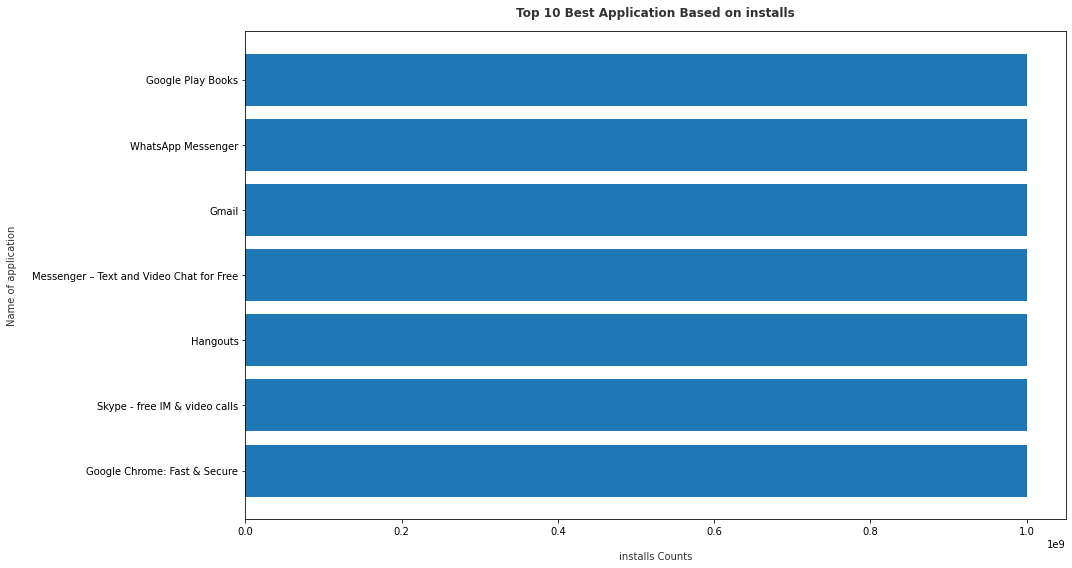

In [116]:
from IPython.display import clear_output
def extractAndPlotData(category='All',payment_mode='All',based_on='rating',limit=10):
    with conn:
        sql_statement = 'Select app_name, {} from app a join category b on a.category_id = b.category_id join Payment c on a.payment_type_id = c.type_id where 1==1 '.format(based_on,based_on)
        if category != 'All':
            sql_statement += 'and b.category_name = "{}" '.format(category)
        if payment_mode != 'All':
            sql_statement += 'and c.type_desc = "{}" '.format(payment_mode)
        sql_statement += 'and {} >= 0 order by {} desc LIMIT {}'.format(based_on, based_on,limit)
        # print(sql_statement)

        result = pd.read_sql_query(sql_statement, conn)
        # print(result)
        result = result.iloc[::-1]
        fig, ax = plt.subplots(figsize=(15,8))
 
        if result.shape[0] != 0:
            if result.iloc[:,1].isnull().values.any() != True:

                # Save the chart so we can loop through the bars below.
                bars = ax.barh(result.iloc[:,0], result.iloc[:,1])

                # Add labels and a title.
                ax.set_xlabel('{} Counts'.format(based_on), labelpad=15, color='#333333')
                ax.set_ylabel('Name of application', labelpad=15, color='#333333')
                ax.set_title('Top {} Best Application Based on {}'.format(limit, based_on), pad=15, color='#333333', weight='bold')

                fig.tight_layout()
            else:
                ax.set_title('None Datatype Present !!! - Top {} Apps based on {}'.format(limit, based_on), pad=15, color='#333333', weight='bold')
        else :
            ax.set_title('No Data Found for !!! - Top {} Best Application Based on {}'.format(limit, based_on), pad=15, color='#333333', weight='bold')
extractAndPlotData(based_on='installs')

In [117]:
from google.colab import output
import time 

def on_button_clicked(b):
        clear_output()
        category = form_items[0].children[1].value
        payment_mode = form_items[1].children[1].value
        based_on = form_items[2].children[1].value
        limit = form_items[3].children[1].value
        time.sleep(1)
        extractAndPlotData(category=category, payment_mode=payment_mode, based_on=based_on, limit=limit)
        display(form)

Box(children=(Box(children=(Label(value='Category : '), Dropdown(index=9, options=('All', 'Art and design', 'A…

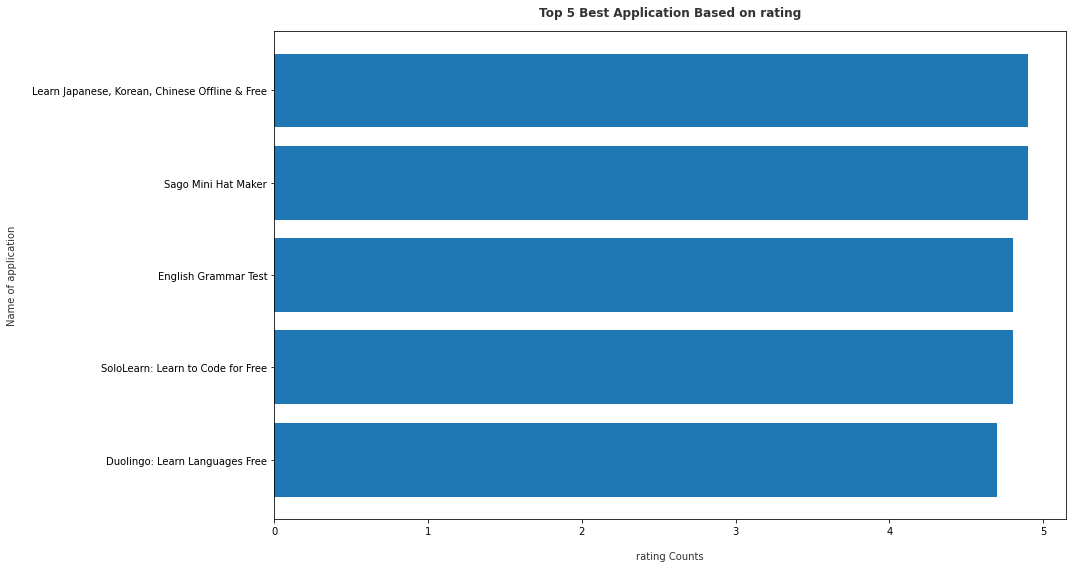

In [118]:
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider, SelectionRangeSlider


form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

button = widgets.Button(description="Plot Graph !")
output = widgets.Output()

form_items = [
    Box([Label(value='Category : '), Dropdown(options=['All']+distinct_categories)], layout=form_item_layout),
    Box([Label(value='Payment Mode : '), Dropdown(options=['All']+distinct_payment_type)], layout=form_item_layout),
    Box([Label(value='Based on : '), Dropdown(options=['rating', 'installs', 'reviews', 'size'])], layout=form_item_layout),
    Box([Label(value='How many top : '), Dropdown(options=['5', '10', '15', '20', '25'])], layout=form_item_layout),
    Box([Label(value='Submit : '), button], layout=form_item_layout),
]

button.on_click(on_button_clicked)

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
form


### On average which application categories are heavy in size?







In [120]:

with conn:
    sql_statement = ''' SELECT b.category_name, AVG(a.size) AS counts
                        FROM app a JOIN category b ON a.category_id = b.category_id
                        JOIN Payment c ON a.payment_type_id = c.type_id
                        GROUP BY b.category_name;'''

    result = pd.read_sql_query(sql_statement, conn)
        
    fig = px.pie(result, values='counts', names='category_name', title='Average Size of each category.')
    fig.show()

**Analysis from plot :**

> 1. On average Games are taking much space as compared to other applications.
> 2. More than 75% of the application are less than 20 Mb in size except for a few categories like Games, Family, Sports, and Parenting. 
> 3. Low space application categories are Tools and Communication which only consumes Less than 7 Mb on average.   


# Predicting number of installs using linear regression
Now we attempt to predict the number of installs based on app features

In [121]:
from sklearn.linear_model import LinearRegression
data = df
data = data.iloc[:,:-4]

# remove rows with very less number of install to normalize the distribution of installs
data = data[data['Installs']>10000]
data.head()

# one hot encoding for categorical variables
one_hot_type = pd.get_dummies(df['Type'])
data.drop('Type',axis=1,inplace=True)
data = data.join(one_hot_type)
one_hot_category = pd.get_dummies(df['Category'])
data.drop('Category',axis=1,inplace=True)
data = data.join(one_hot_category)
one_hot_contentrating = pd.get_dummies(df['Content Rating'])
data.drop('Content Rating',axis=1,inplace=True)
data = data.join(one_hot_contentrating)

#drop apps with negative value of size
index_names = data[data['Size']<0].index
data.drop(index_names,inplace=True)
data.head()
# data.shape

,App,Rating,Reviews,Size,Installs,Price,Free,Paid,Art and design,Auto and vehicles,Beauty,Books and reference,Business,Comics,Communication,Dating,Education,Entertainment,Events,Family,Finance,Food and drink,Game,Health and fitness,House and home,Libraries and demo,Lifestyle,Maps and navigation,Medical,News and magazines,Parenting,Personalization,Photography,Productivity,Shopping,Social,Sports,Tools,Travel and local,Video players,Weather,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
1,Coloring book moana,3.9,967,14.0,500000,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,5000000,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25.0,50000000,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,Paper flowers instructions,4.4,167,5.6,50000,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### Plotting the correlation between features of the dataset

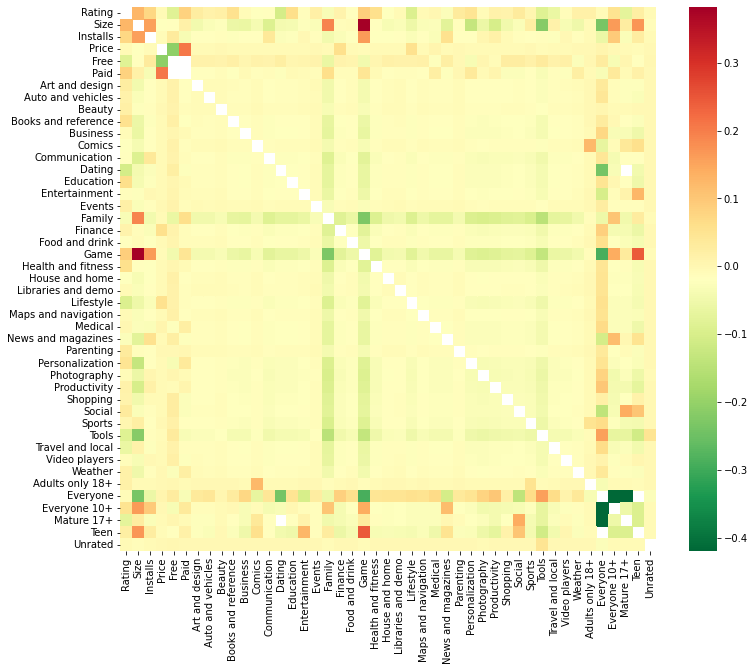

In [122]:
corr = data.corr()
corr2 = corr[corr>0.1]
# sns.heatmap(corr2)
plt.figure(figsize=(12,10))

sns.heatmap(corr, cmap='RdYlGn_r', mask = (np.abs(corr) >= 0.5))

From the above heatmap, we can easily observe that majority of features have around zero correlation among them. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



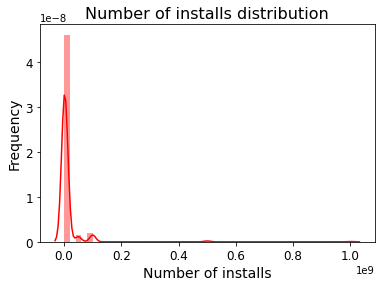

In [123]:
sns.distplot(data['Installs'], color = 'r')
plt.title('Number of installs distribution', fontsize = 16)
plt.xlabel('Number of installs', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

In [124]:
from sklearn.model_selection import train_test_split
variables = list(data.columns)
data.fillna(0,inplace=True)
variables = variables[1:]
variables.remove('Installs')
print(variables)
X_var = data[variables].values
y_var = data['Installs'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)


['Rating', 'Reviews', 'Size', 'Price', 'Free', 'Paid', 'Art and design', 'Auto and vehicles', 'Beauty', 'Books and reference', 'Business', 'Comics', 'Communication', 'Dating', 'Education', 'Entertainment', 'Events', 'Family', 'Finance', 'Food and drink', 'Game', 'Health and fitness', 'House and home', 'Libraries and demo', 'Lifestyle', 'Maps and navigation', 'Medical', 'News and magazines', 'Parenting', 'Personalization', 'Photography', 'Productivity', 'Shopping', 'Social', 'Sports', 'Tools', 'Travel and local', 'Video players', 'Weather', 'Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+', 'Teen', 'Unrated']


In [125]:
data['Rating'].unique

<bound method Series.unique of 1        3.9
2        4.7
3        4.5
4        4.3
5        4.4
        ... 
10815    4.2
10817    4.0
10830    3.8
10832    3.8
10840    4.5
Name: Rating, Length: 4787, dtype: float64>

### Data normalization

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
train_set = scaler.transform(X_train)
test_set = scaler.transform(X_test)

### Prediction using linear regression model

In [129]:
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)
# print(ols_yhat)
# print(y_test)
predictions = []
# for i in ols_yhat:
#   predictions.append(round(i,0))
# sns.regplot(x=y_test,y=)
from sklearn.metrics import r2_score
print(r2_score(y_test,ols_yhat))


0.48016126983743646


### **Conclusion**
> 1. There is no strong correlation between the number of installs and other features.
> 2. Linear regression can predict the number of installs with an accuracy of ~48% which is not far from guessing.
> 3. We can try other advanced approaches for predicting number of features but we suspect that achieving higher results is going to be challenging due to the nature of data.
> 4. There are other external factors outside the scope of the data that can determine the popularity of an app.

Dropping all tables in the end

In [130]:
# dropping all tables in the end
conn = create_connection(db_filename)
with conn:
    c = conn.cursor()
    c.execute('''Drop table if exists App''')
    c.execute('''Drop table if exists ContentRating''')
    c.execute('''Drop table if exists Payment''')
    c.execute('''Drop table if exists Category''')